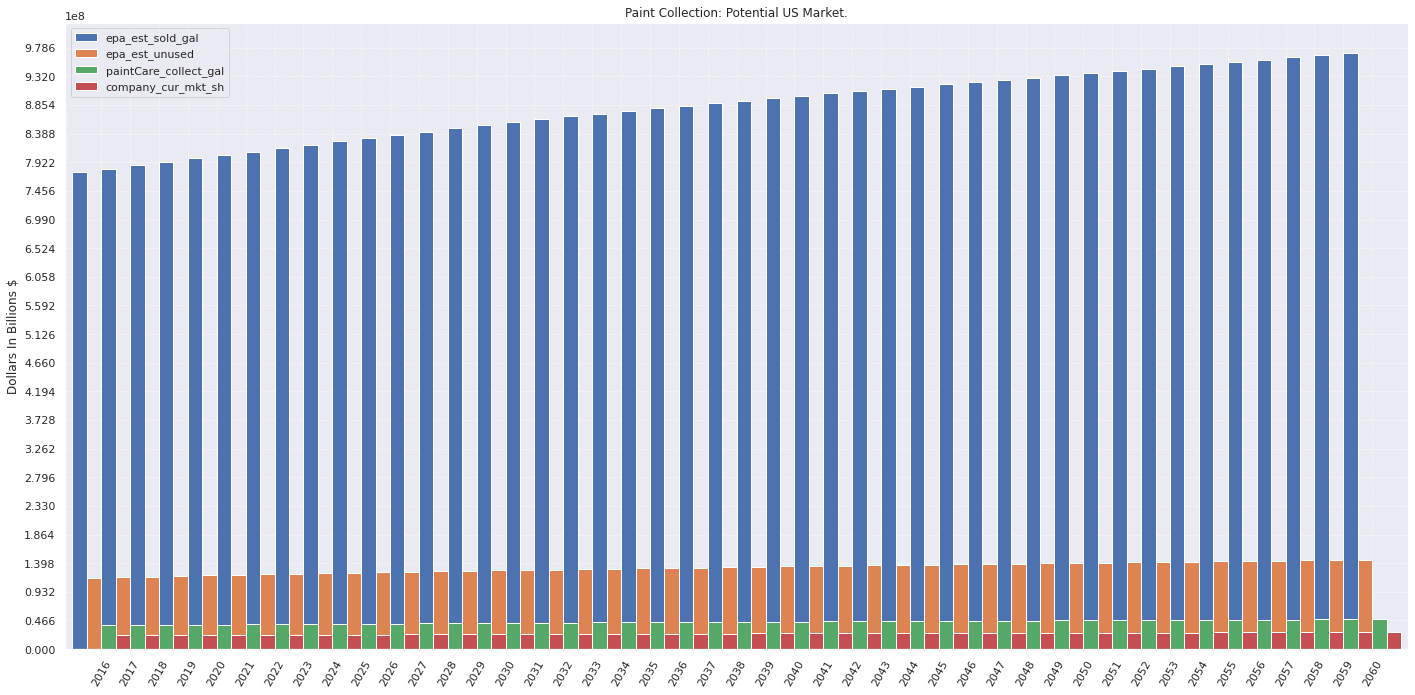

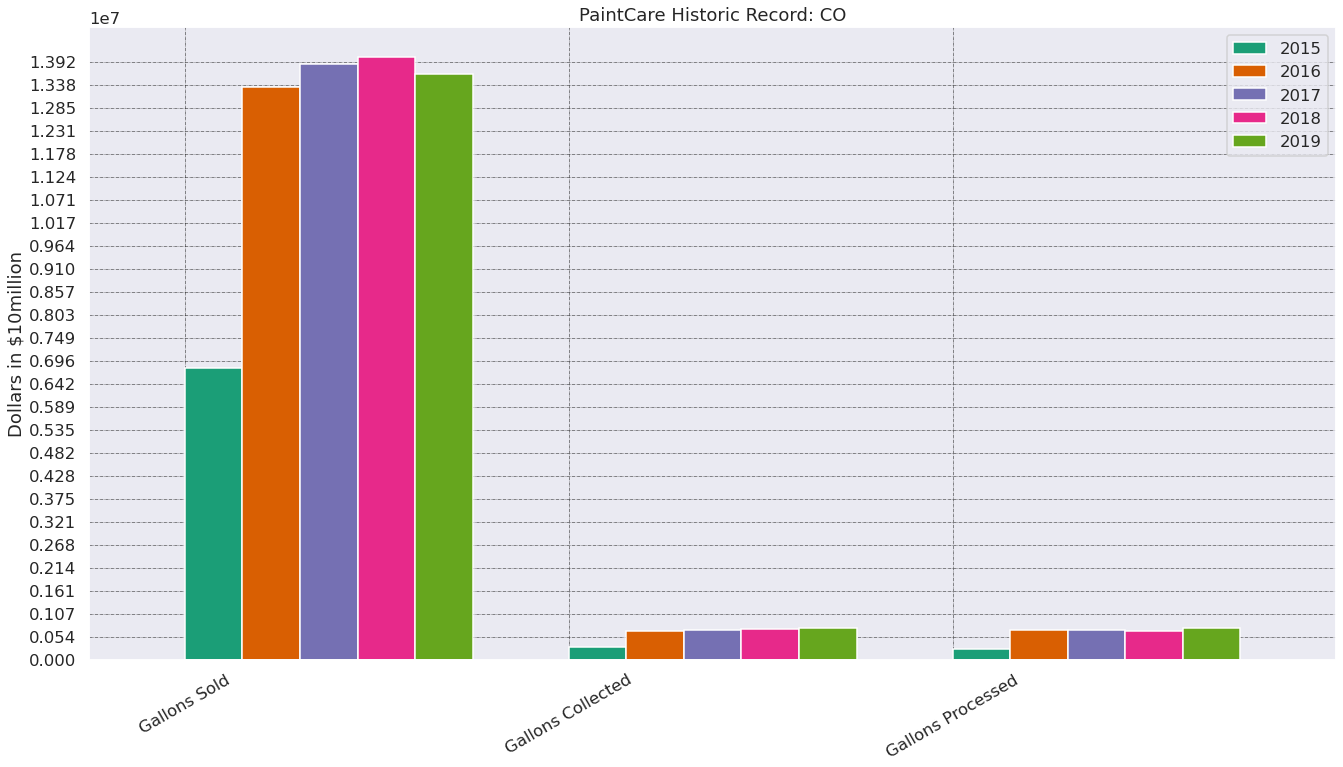

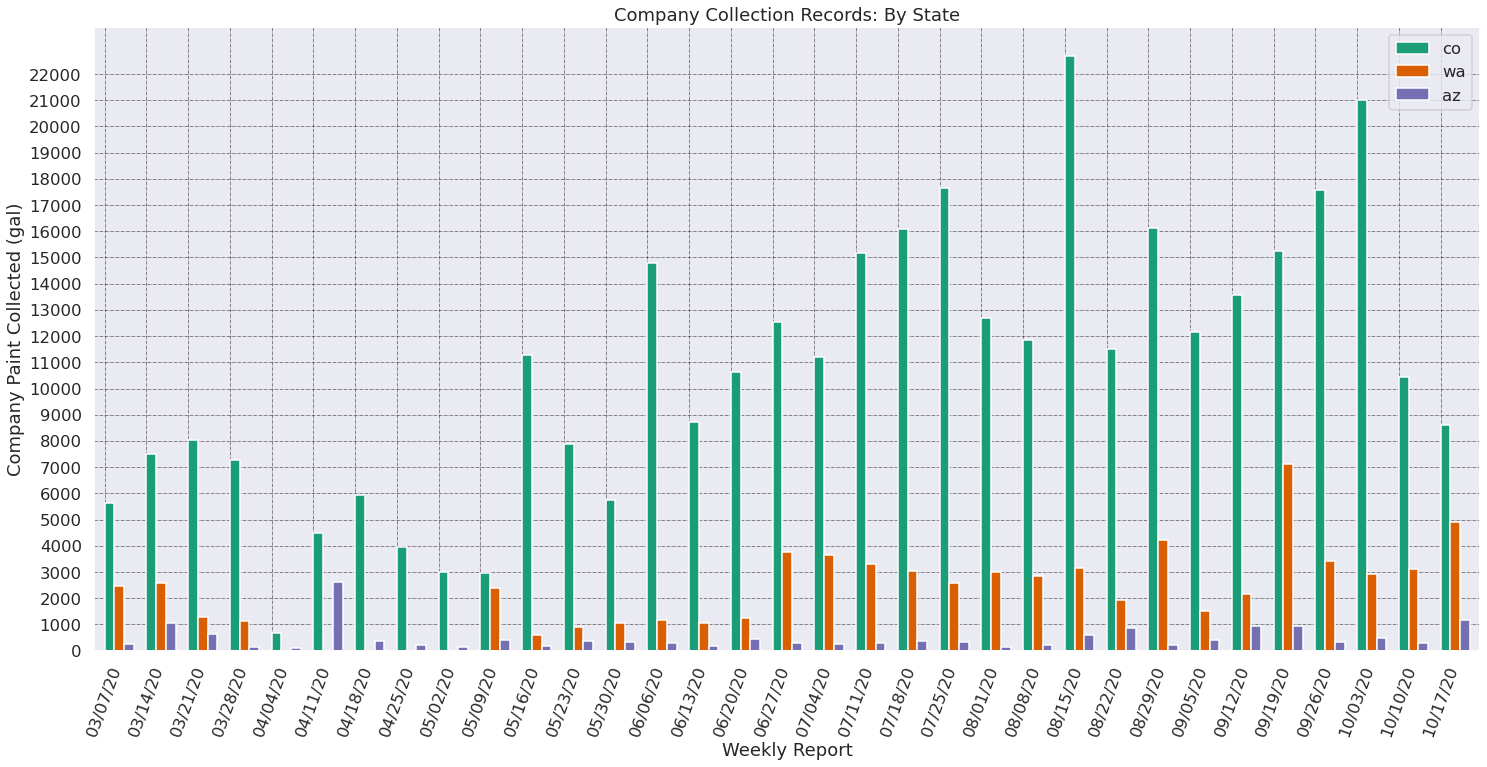

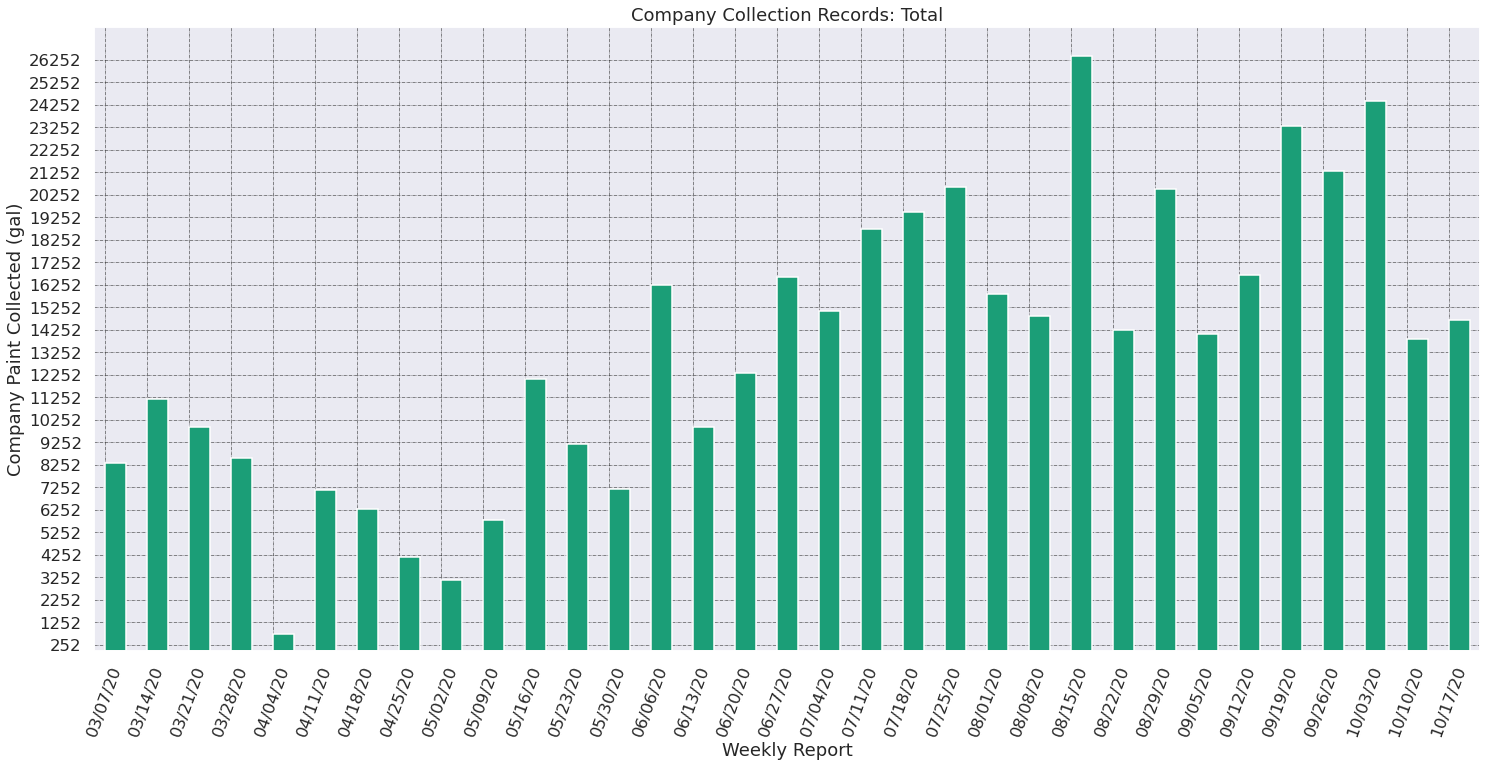

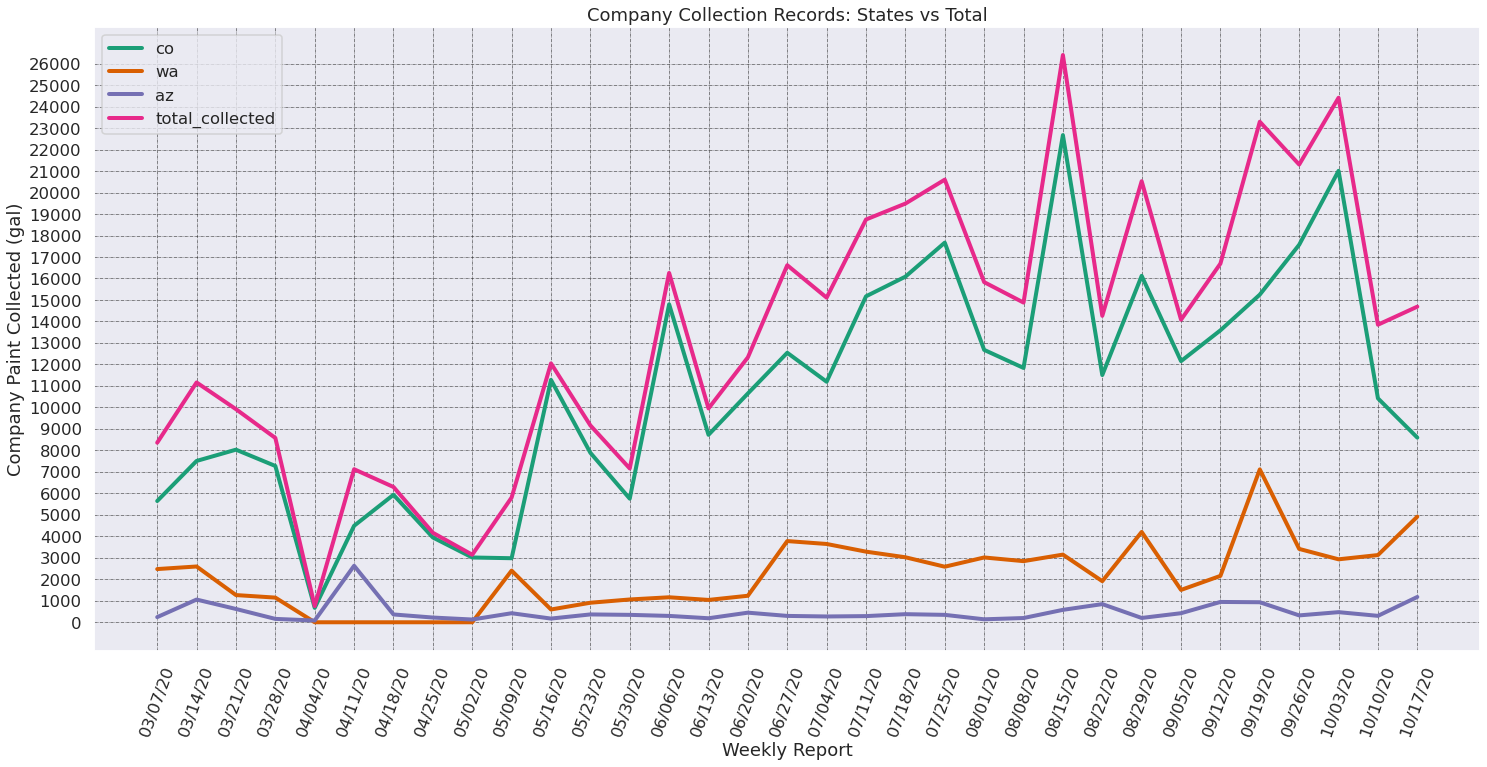

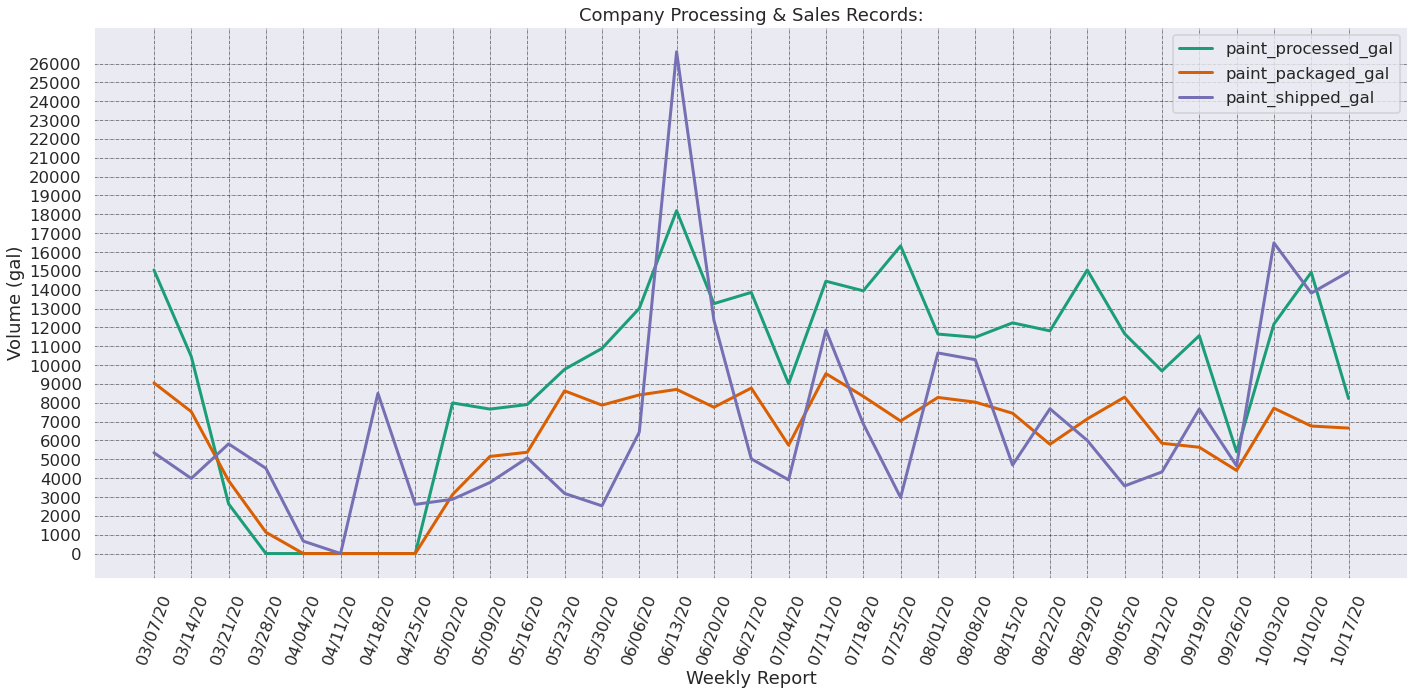

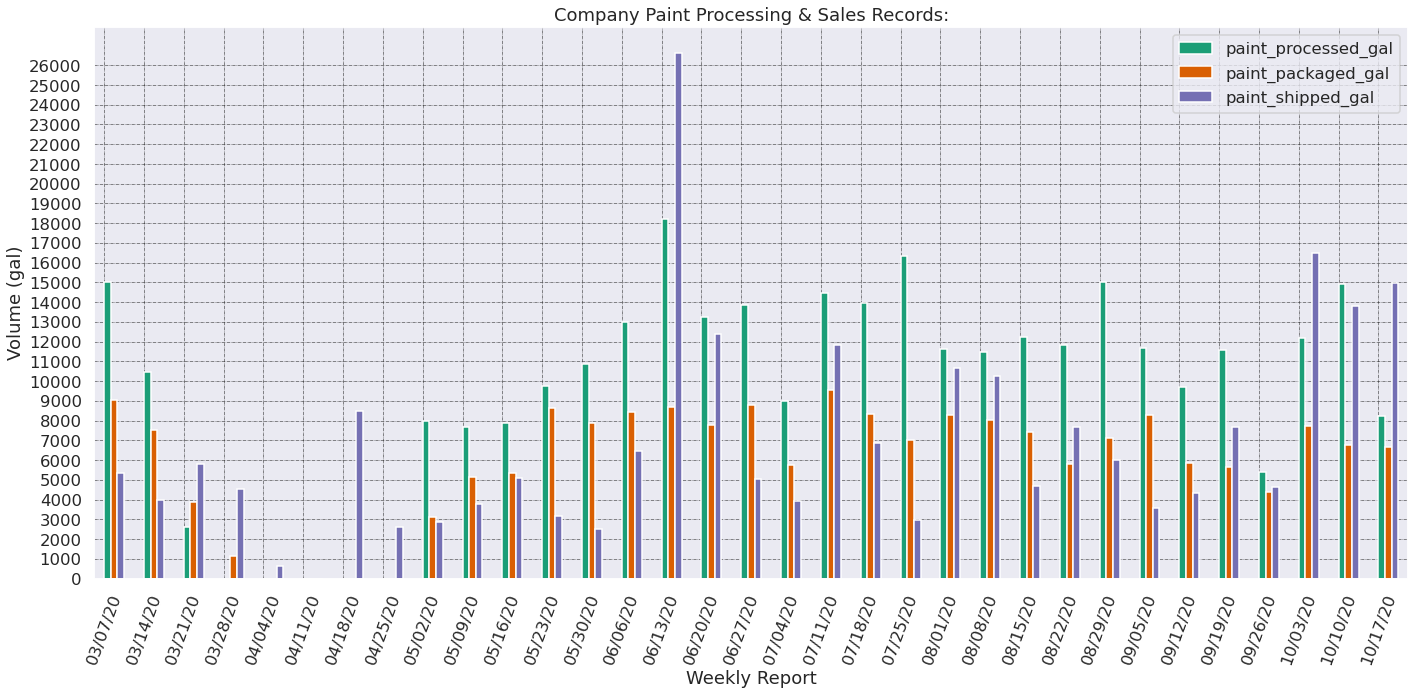

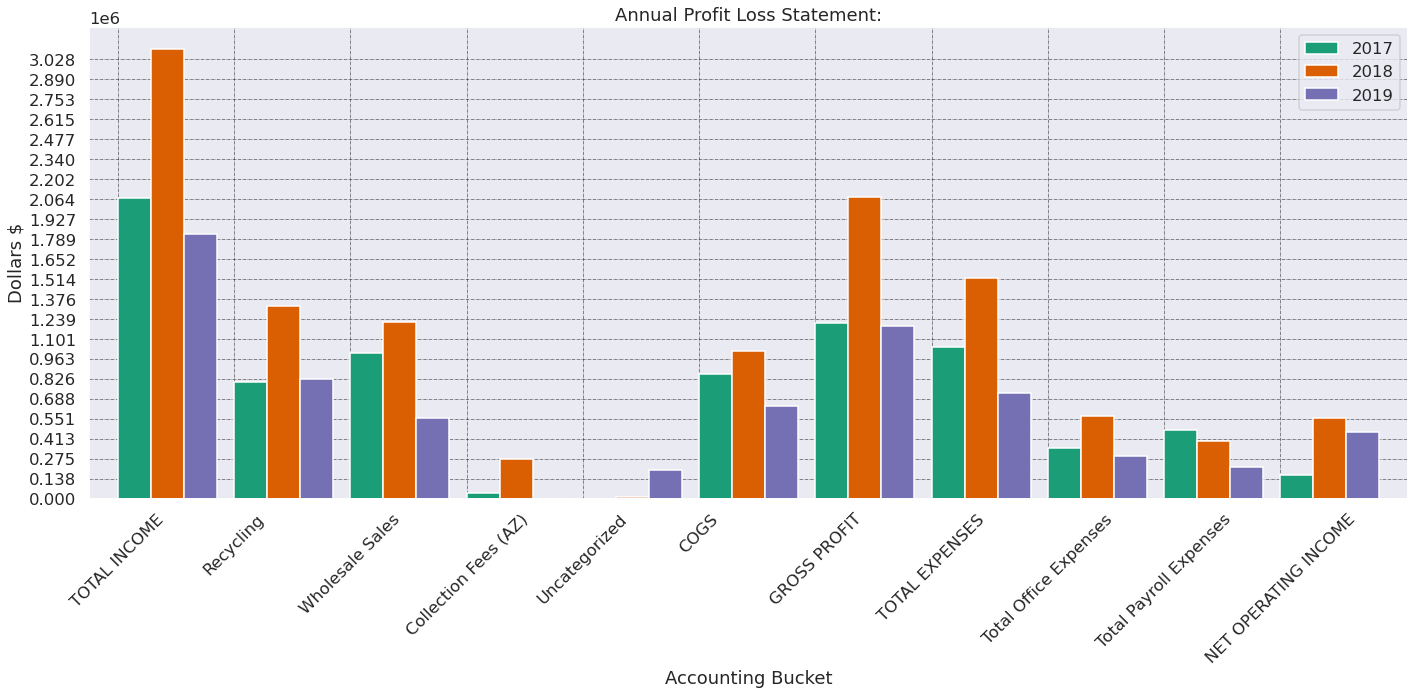

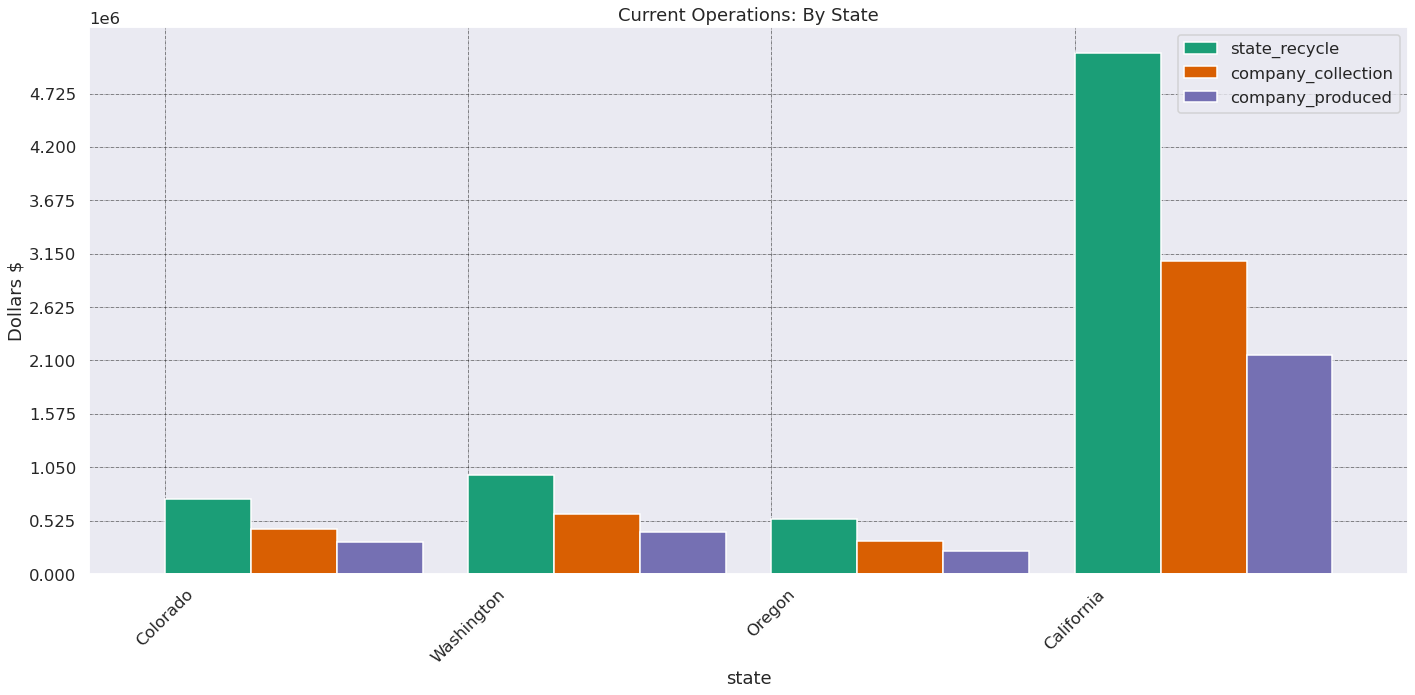

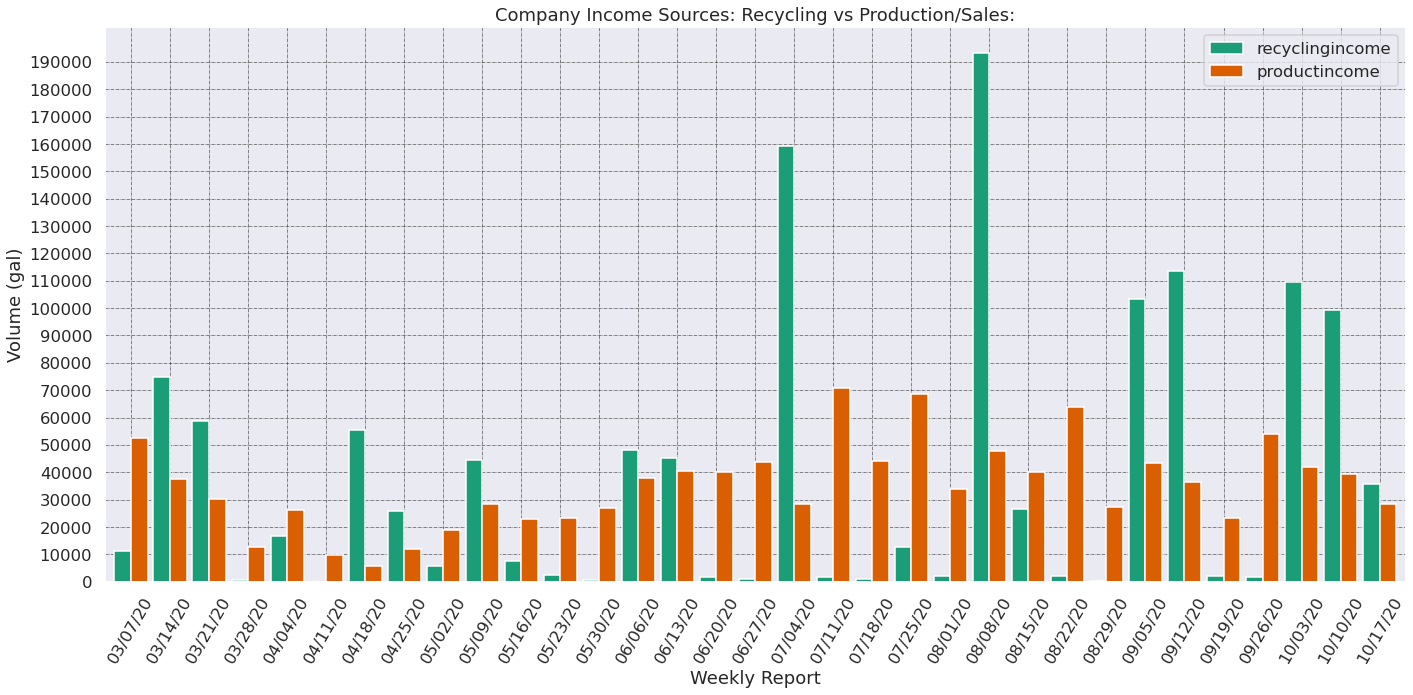

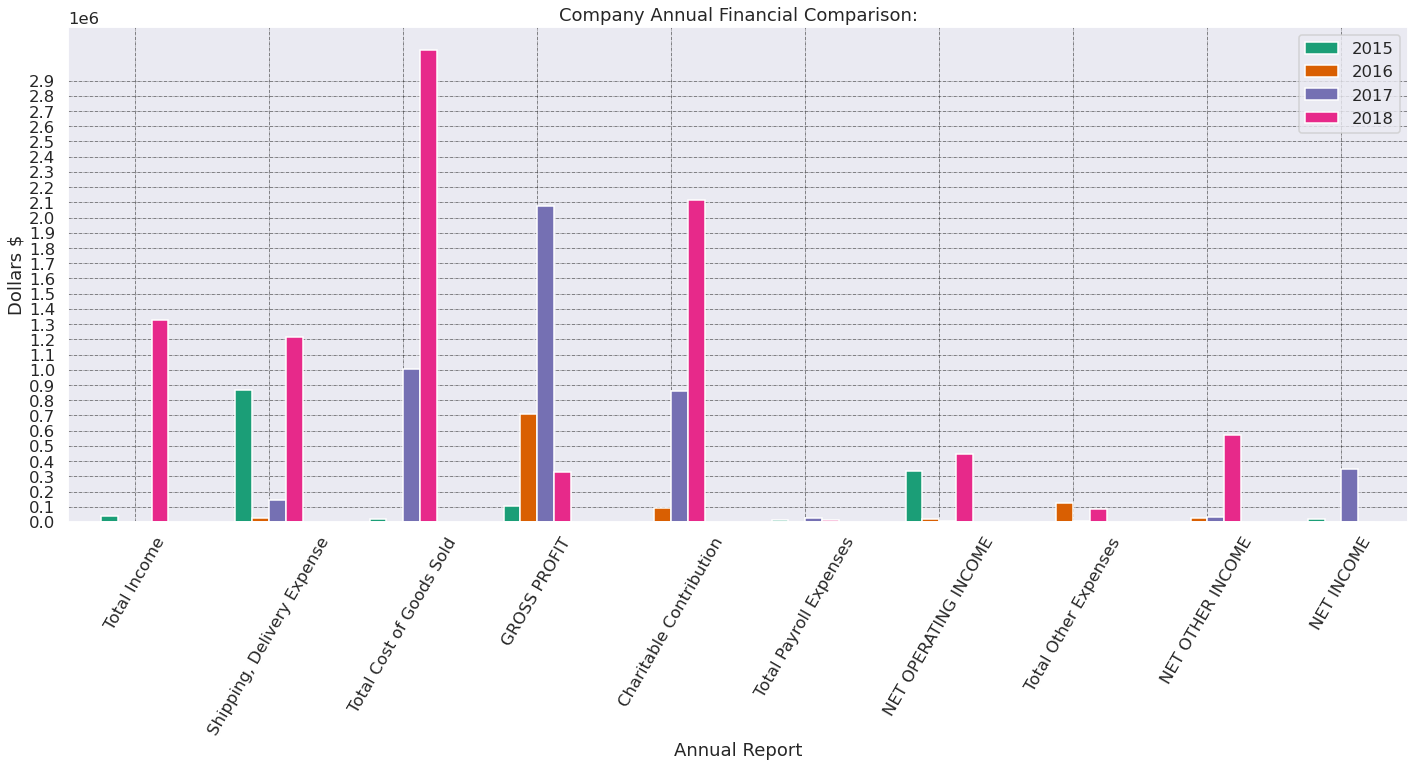

In [9]:
import pandas as pd
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.size' : 16, 'font.family' : 'sans'})
import scipy as sp
import scipy.stats as stats
import seaborn as sns
sns.set()
from datetime import date, datetime, timedelta
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')

data_lst0 = ['assumptions', 'census', 'paintCare_CO', 'paint_collected', 'paint_processed', 'profit_loss', 'proforma', 'states', 'total_cost', 'weekly_kpi', 
'gs_pl_2015', 'gs_pl_2016', 'gs_pl_2017', 'gs_pl_2018']
data = []
ranger = len(data_lst0)


data = []
def imports():
    data_lst0 = ['census', 'paintcare_co', 'paint_collected','paint_processed',
                 'profit_loss','proforma', 'states', 'total_cost', 'weekly_kpi',
                 'gs_pl_2015', 'gs_pl_2016', 'gs_pl_2017', 'gs_pl_2018']
    for n in range(len(data_lst0)):
        data.append(pd.read_csv('data/'+str(data_lst0[n])+'.csv'))
    return data
        
def clean(clean_lst0):
    clean_lst = imports()
    for clean in clean_lst:
        columns = clean.columns
        cols = [column.replace(' ', '_') for column in columns]
        cols = [col.replace('.','') for col in cols]
        cols = [col.replace('(','') for col in cols]
        cols = [col.replace(')','') for col in cols]
        cols = [col.replace(':','') for col in cols]
        clean.columns = [col.lower() for col in cols]
    for clean in clean_lst:
        clean.fillna(0, inplace = True)
    return clean_lst

imports()
data = clean(data)



census = data[0][['year','total_pop']]
census['total_pop'] = census['total_pop'].astype(float)
census['epa_est_sold_gal'] = census['total_pop'] * 2.4
census['epa_est_unused'] = census['epa_est_sold_gal'] * 0.15
census['paintCare_collect_gal'] = census['epa_est_sold_gal'] * 0.05
census['company_cur_mkt_sh'] = census['paintCare_collect_gal'] * 0.57

x = np.arange(len(census['epa_est_sold_gal']))
step = int((int(census['epa_est_sold_gal'].max()) - int(census['paintCare_collect_gal'].min())) / 20)
y = np.arange(0, int(census['epa_est_sold_gal'].max()) + step, step)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, ylabel='Dollars In Billions $') 
census[['epa_est_sold_gal', 'epa_est_unused', 'paintCare_collect_gal', 'company_cur_mkt_sh']].plot(kind = 'bar', ax=ax, width = 2)
ax.set_xticks(x)
ax.set_xticklabels(census['year'], rotation = 60)
ax.set_yticks(y)
ax.set_title('Paint Collection: Potential US Market.')
plt.grid(which="major", linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/census_bar_potential_mkt.png')
plt.show()



paintcare_co = data[1]

x = np.arange(len(paintcare_co['2019']))
step = int((int(paintcare_co['2019'].max()) - int(paintcare_co['2015'].min())) / 25)
y = np.arange(0, int(paintcare_co['2019'].max())+step, step)
fig = plt.figure(figsize=(19, 11))
ax = fig.add_subplot(111, ylabel = 'Dollars in $10million') 
paintcare_co[['2015', '2016', '2017', '2018', '2019']].plot(kind = 'bar',ax=ax, width = .75, align = 'edge')
ax.set_xticks(x)
ax.set_xticklabels(paintcare_co['co_record'], rotation = 30)
ax.set_yticks(y)
ax.set_title('PaintCare Historic Record: CO')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/cpaintcare_co_records.png')
plt.show()



paint_collected = data[2]
date = list(paint_collected.columns[1:])
paint_collected = paint_collected.set_index('paint_collected_gallons').transpose()
columns = paint_collected.columns
cols = [column.replace(' ', '_') for column in columns]
paint_collected.columns = [col.lower() for col in cols]
paint_collected['date'] = date
paint_collected.head()


x = np.arange(len(paint_collected['co']))
y = np.arange(0, int(paint_collected['co'].max()) + 250, 1000)
fig = plt.figure(figsize=(21, 11))
ax = fig.add_subplot(111, ylabel = 'Company Paint Collected (gal)',
                     xlabel = 'Weekly Report') 
paint_collected[['co','wa', 'az']].plot(kind = 'bar', ax = ax, width = .7, align = 'edge')
ax.set_xticks(x)
ax.set_xticklabels(paint_collected['date'], rotation = 70)
ax.set_yticks(y)
ax.set_title('Company Collection Records: By State')
plt.grid(color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/paint_collected_bar_states.png')
plt.show()


x1 = np.arange(len(paint_collected['total_collected']))
y1 = np.arange(int(paint_collected['total_collected'].min()) - 500, 
               int(paint_collected['total_collected'].max()) + 500, 1000)
fig = plt.figure(figsize=(21, 11))
ax1 = fig.add_subplot(111, ylabel = 'Company Paint Collected (gal)',
                      xlabel = 'Weekly Report') 
paint_collected['total_collected'].plot(kind = 'bar', ax = ax1, width = 0.5, align = 'edge')
ax1.set_xticks(x1)
ax1.set_xticklabels(paint_collected['date'], rotation = 70)
ax1.set_yticks(y1)
ax1.set_title('Company Collection Records: Total')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/paint_collected_bar_total.png')
plt.show()


x2 = np.arange(len(paint_collected['total_collected']))
y2 = np.arange(0, int(paint_collected['total_collected'].max()) + 250, 1000)
fig = plt.figure(figsize=(21, 11))
ax2 = fig.add_subplot(111, ylabel = 'Company Paint Collected (gal)', xlabel = 'Weekly Report') 
paint_collected[['co', 'wa', 'az', 'total_collected']].plot(ax = ax2, linewidth=4.0)
ax2.set_xticks(x2)
ax2.set_xticklabels(paint_collected['date'], rotation = 70)
ax2.set_yticks(y2)
ax2.set_title('Company Collection Records: States vs Total')
plt.grid(True, which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/paint_collected_line_statesANDtotal.png')
plt.show()



paint_processed = data[3]
date = list(paint_processed.columns[1:])
paint_processed = paint_processed.set_index('total_paint_processing').transpose()
paint_processed.columns = ['paint processed gal','paint packaged gal', 'paint shipped gal']
columns = paint_processed.columns
cols = [column.replace(' ', '_') for column in columns]
paint_processed.columns = [col.lower() for col in cols]
paint_processed['date'] = date
paint_processed.head()


x = np.arange(len(paint_processed['paint_shipped_gal']))
y = np.arange(0, int(paint_processed['paint_shipped_gal'].max()) + 250, 1000)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, ylabel = 'Volume (gal)',xlabel = 'Weekly Report') 
paint_processed[['paint_processed_gal',
                 'paint_packaged_gal', 'paint_shipped_gal']].plot(ax = ax, linewidth=3.0)
ax.set_xticks(x)
ax.set_xticklabels(paint_collected['date'], rotation = 70)
ax.set_yticks(y)
ax.set_title('Company Processing & Sales Records:')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/paintProcessed_line_processed_packaged_shipped.png')
plt.show()


x = np.arange(len(paint_processed['paint_shipped_gal']))
y = np.arange(0, int(paint_processed['paint_shipped_gal'].max()) + 250, 1000)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111, ylabel = 'Volume (gal)',xlabel = 'Weekly Report') 
paint_processed[['paint_processed_gal', 
                 'paint_packaged_gal',
                 'paint_shipped_gal']].plot(kind = 'bar',width = .5, align = 'edge', ax = ax1)
ax1.set_xticks(x)
ax1.set_xticklabels(paint_collected['date'], rotation = 70)
ax1.set_yticks(y)
ax1.set_title('Company Paint Processing & Sales Records:')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/paintProcessed_bar_processed_packaged_shipped.png')
plt.show()



profit_loss = data[4]
x = np.arange(len(profit_loss['2018']))
step = int((int(profit_loss['2017'].max()) - int(profit_loss['2018'].min())) / 15)
y = np.arange(0, int(profit_loss['2018'].max()), step)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, ylabel='Dollars $', xlabel = 'Accounting Bucket') 
profit_loss[['2017', '2018', '2019']].plot(kind='bar', ax = ax, width = .85, align = 'edge')
ax.set_xticks(x)
ax.set_xticklabels(profit_loss['category'], rotation = 45)
ax.set_yticks(y)
ax.set_title('Annual Profit Loss Statement:')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/profitLoss_bar_historical_cashFlow.png')
plt.show()



proforma = data[5].drop([2, 5, 6, 7, 8])

proforma.columns = ['state', 'population', 'total_sold', 'state_recycle', 'company_collection', 'company_produced']
proforma = proforma.set_index('state').transpose()
location = proforma.columns
proforma = proforma.transpose()
proforma['location'] = location

x = np.arange(len(proforma['total_sold']))
y = np.arange(0, 5250000, (5250000 / 10))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, ylabel='Dollars $', xlabel = 'Current Operations') 
proforma[['state_recycle', 'company_collection', 'company_produced']].plot(kind = 'bar', ax = ax, width = .85, align = 'edge')
ax.set_xticks(x)
ax.set_xticklabels(proforma['location'], rotation = 45)
ax.set_yticks(y)
ax.set_title('Current Operations: By State')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/proforma_bar_recycle_collect_produce_ByState.png')
plt.show()



state = data[6]

state.at[51, 'state'] = 'Total'
state.at[50, 'rank_1-50'] = 51

state = state.drop(['2010_pop', '%_to_total', 'potential_gals_paint',
                    'potential_rev_@_$15_gal', 'gross_profit_est_65%',
                    'rank_1-50'], axis = 1)
state = state.sort_values(by = '2018_pop', ascending = False)
state['rank'] = np.arange(0, 52)
state['2018_pop'] = state['2018_pop'].astype(float)
state.set_index('rank', inplace = True)

# state['sold'] = state['2018_pop'] * 2.4
# state['collected'] = state['sold'] * 0.05
# state['revenue'] = state['collected'] * 3.8
# state['company'] = state['revenue'] * 0.35

s = state.drop([0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48])
s['Rank'] = np.arange(len(s['state']))
s.set_index('Rank')



total_cost = data[7]
total_cost.set_index('category').transpose()



weekly_kpi = data[8]
date = list(weekly_kpi.columns[1:])
weekly_kpi = weekly_kpi.set_index('sales').transpose()
weekly_kpi['date'] = date
columns = weekly_kpi.columns
cols = [column.replace('_____', '') for column in columns]
cols = [column.replace(' ', '') for column in columns]
weekly_kpi.columns = [col.lower() for col in cols]

x = np.arange(len(weekly_kpi['recyclingincome']))
y = np.arange(0, 196000 , 10000)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, ylabel = 'Volume (gal)',xlabel = 'Weekly Report') 
weekly_kpi[['recyclingincome','productincome']].plot(kind = 'bar', ax = ax, width = .85, align = 'center')
ax.set_xticks(x)
ax.set_xticklabels(weekly_kpi['date'], rotation = 60)
ax.set_yticks(y)
ax.set_title('Company Income Sources: Recycling vs Production/Sales:')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/weeklyKPI_bar_income_recycle_vs_processed.png')
plt.show()



pl_2015, pl_2016, pl_2017, pl_2018 = data[9], data[10], data[11], data[12]
lst_of_lst_0 = [pl_2015, pl_2016, pl_2017, pl_2018]

pl2015, pl2016, pl2017, pl2018 = (pl_2015[pl_2015.columns[0]]), (pl_2016[pl_2016.columns[0]]), (pl_2017[pl_2017.columns[0]]), (pl_2018[pl_2018.columns[0]])
lst_of_lst = [pl2015, pl2016, pl2017, pl2018]

one = set(pl2015) & set(pl2016)
two = set(pl2017) & set(pl2018)
three = two & one

for idx, num in enumerate(lst_of_lst):
    for i, n in enumerate(num):
        if n not in three:
            lst_of_lst_0[idx] = lst_of_lst_0[idx].drop(i)
            
pl_2015, pl_2016, pl_2017, pl_2018 = lst_of_lst_0[0], lst_of_lst_0[1], lst_of_lst_0[2], lst_of_lst_0[3]

category = list(pl_2015['january_-_december_2015'])
df = pd.DataFrame()
df['category'] = category
df['2015'] = pl_2015['total']
df['2016'] = pl_2016['total']
df['2017'] = pl_2017['total']
df['2018'] = pl_2018['total']
df.fillna(0.0, inplace = True)
df = df.drop([0,1,2,3,4,8,15, 35, 38, 42, 36,17,18,22,23,27,28,29,31,32,33,34,37,39,6,14,16,20,21,24,26,41,43,47,48,7,12,13,25,30,44,46])
df

x = np.arange(len(df['2015']))
y = np.arange(0, 3000000 , 100000)
fig = plt.figure(figsize=(20, 11))
labels = df.columns[1:]
ax = fig.add_subplot(111, ylabel = 'Dollars $', xlabel = 'Annual Report') 
df[['2015','2016', '2017','2018']].plot(kind = 'bar', ax = ax, width = .5, align = 'center')
ax.set_xticks(x)
ax.set_xticklabels(df['category'], rotation = 60)
ax.set_yticks(y)
ax.set_title('Company Annual Financial Comparison:')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.tight_layout()
plt.savefig('images/annualReport_bar_2015_2018.png')
plt.show()